              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.84      1.00      0.92        54
           2       1.00      0.33      0.50         9

    accuracy                           0.90        96
   macro avg       0.95      0.74      0.78        96
weighted avg       0.91      0.90      0.88        96



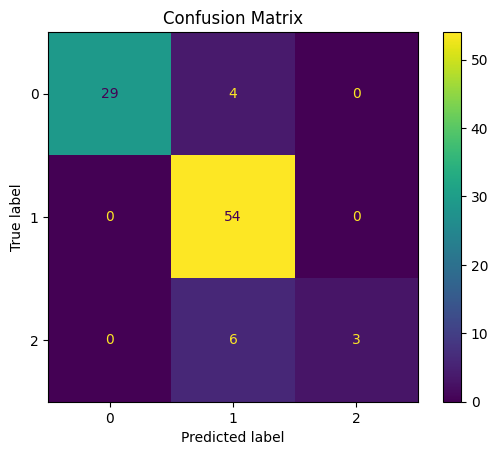

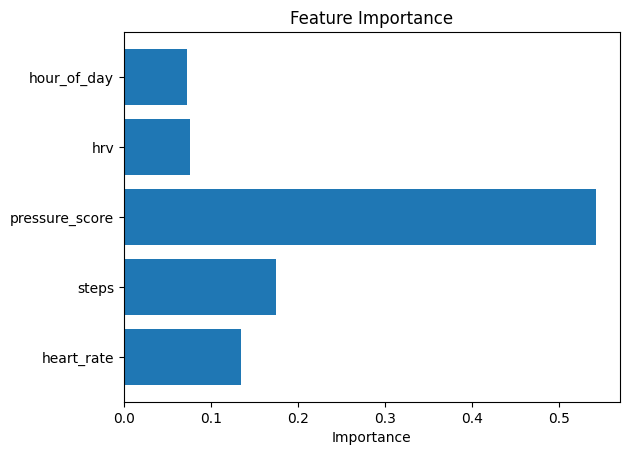

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('simulated_emotion_data_noisy.csv')
features = ['heart_rate', 'steps', 'pressure_score', 'hrv', 'hour_of_day']
X = df[features]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

# 特征重要性
importances = clf.feature_importances_
plt.barh(features, importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()